# Unit 5 - Financial Planning

In [ ]:
# Initial imports
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Create variable to hold Crypto API request urls
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD?format=json"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD?format=json"

In [5]:
# Execute get request
requests.get(btc_url)

<Response [200]>

In [6]:
# Execute get request and store response
btc_response_data = requests.get(btc_url)

In [7]:
# Get content
btc_response_content = btc_response_data.content
print(btc_response_content)

b'{\n\t"data": {\n\t\t"1": {\n\t\t\t"id": 1,\n\t\t\t"name": "Bitcoin",\n\t\t\t"symbol": "BTC",\n\t\t\t"website_slug": "bitcoin",\n\t\t\t"rank": 1,\n\t\t\t"circulating_supply": 18940125,\n\t\t\t"total_supply": 18940125,\n\t\t\t"max_supply": 21000000,\n\t\t\t"quotes": {\n\t\t\t\t"USD": {\n\t\t\t\t\t"price": 37205.0000000000000000,\n\t\t\t\t\t"volume_24h": 45876451796,\n\t\t\t\t\t"market_cap": 701886385305,\n\t\t\t\t\t"percentage_change_1h": 0.5079262464152680,\n\t\t\t\t\t"percentage_change_24h": 2.6725647821028300,\n\t\t\t\t\t"percentage_change_7d": -12.2422641690257000,\n\t\t\t\t\t"percent_change_1h": 0.5079262464152680,\n\t\t\t\t\t"percent_change_24h": 2.6725647821028300,\n\t\t\t\t\t"percent_change_7d": -12.2422641690257000\n\t\t\t\t}\n\t\t\t},\n\t\t\t"last_updated": 1643167436\n\t\t}\n\t},\n\t"metadata": {\n\t\t"timestamp": 1643167436,\n\t\t"num_cryptocurrencies": 3105,\n\t\t"error": null\n\t}\n}'


In [8]:
# Use json function from json library to format
btc_data = btc_response_data.json()
print(btc_data)

{'data': {'1': {'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'website_slug': 'bitcoin', 'rank': 1, 'circulating_supply': 18940125, 'total_supply': 18940125, 'max_supply': 21000000, 'quotes': {'USD': {'price': 37205.0, 'volume_24h': 45876451796, 'market_cap': 701886385305, 'percentage_change_1h': 0.507926246415268, 'percentage_change_24h': 2.67256478210283, 'percentage_change_7d': -12.2422641690257, 'percent_change_1h': 0.507926246415268, 'percent_change_24h': 2.67256478210283, 'percent_change_7d': -12.2422641690257}}, 'last_updated': 1643167436}}, 'metadata': {'timestamp': 1643167436, 'num_cryptocurrencies': 3105, 'error': None}}


In [9]:
# Fetch current BTC price 
btc_price = btc_data['data']['1']['quotes']['USD']['price']
print(btc_price)

37205.0


In [10]:
# Compute current BTC crypto value
my_btc_value = btc_price * my_btc
print(my_btc_value)

44646.0


In [11]:
# Print current BTC crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")

The current value of your 1.2 BTC is $44646.00


In [12]:
# Execute get request
requests.get(eth_url)

<Response [200]>

In [13]:
# Execute get request and store response
eth_response_data = requests.get(eth_url)

In [14]:
# Get JSON content
eth_response_content = eth_response_data.content
print(btc_response_content)

b'{\n\t"data": {\n\t\t"1": {\n\t\t\t"id": 1,\n\t\t\t"name": "Bitcoin",\n\t\t\t"symbol": "BTC",\n\t\t\t"website_slug": "bitcoin",\n\t\t\t"rank": 1,\n\t\t\t"circulating_supply": 18940125,\n\t\t\t"total_supply": 18940125,\n\t\t\t"max_supply": 21000000,\n\t\t\t"quotes": {\n\t\t\t\t"USD": {\n\t\t\t\t\t"price": 37205.0000000000000000,\n\t\t\t\t\t"volume_24h": 45876451796,\n\t\t\t\t\t"market_cap": 701886385305,\n\t\t\t\t\t"percentage_change_1h": 0.5079262464152680,\n\t\t\t\t\t"percentage_change_24h": 2.6725647821028300,\n\t\t\t\t\t"percentage_change_7d": -12.2422641690257000,\n\t\t\t\t\t"percent_change_1h": 0.5079262464152680,\n\t\t\t\t\t"percent_change_24h": 2.6725647821028300,\n\t\t\t\t\t"percent_change_7d": -12.2422641690257000\n\t\t\t\t}\n\t\t\t},\n\t\t\t"last_updated": 1643167436\n\t\t}\n\t},\n\t"metadata": {\n\t\t"timestamp": 1643167436,\n\t\t"num_cryptocurrencies": 3105,\n\t\t"error": null\n\t}\n}'


In [15]:
# Use JSON function from JSON library to format
eth_data = eth_response_data.json()
print(eth_data)

{'data': {'1027': {'id': 1027, 'name': 'Ethereum', 'symbol': 'ETH', 'website_slug': 'ethereum', 'rank': 2, 'circulating_supply': 119313855, 'total_supply': 119313855, 'max_supply': 0, 'quotes': {'USD': {'price': 2473.67, 'volume_24h': 15712825545, 'market_cap': 293636864296, 'percentage_change_1h': 0.611042677942329, 'percentage_change_24h': 2.83639751874296, 'percentage_change_7d': -21.8788348727502, 'percent_change_1h': 0.611042677942329, 'percent_change_24h': 2.83639751874296, 'percent_change_7d': -21.8788348727502}}, 'last_updated': 1643167418}}, 'metadata': {'timestamp': 1643167418, 'num_cryptocurrencies': 3105, 'error': None}}


In [16]:
# Fetch current ETH price
eth_price = eth_data['data']['1027']['quotes']['USD']['price']
print(eth_price)

2473.67


In [17]:
# Compute current ETH crypto value
my_eth_value = eth_price * my_eth
print(my_eth_value)

13110.451


In [18]:
# Print current ETH crypto wallet balance
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 5.3 ETH is $13110.45


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [19]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [20]:
 # Load .env enviroment
load_dotenv()

True

In [2]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [ ]:
# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [24]:
# Format current date as ISO format
today = pd.Timestamp("2022-01-23", tz="America/New_York").isoformat()

In [25]:
# Set start and end datetimes of 1000 days from now, between now and 365 days ago
start_date = pd.Timestamp("2021-01-24", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-01-24", tz="America/New_York").isoformat()

In [26]:
# Set the tickers
tickers = ["AGG", "SPY"]

In [27]:
# Set timeframe to '1D'
timeframe = "1D"

In [ ]:
# Get current closing prices for SPY and AGG
current_price = api.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 1000
).df

In [ ]:
# Display sample data
current_price.head()

In [7]:
# Transform the function's response to a Pandas DataFrame and preview the data
current_price = pd.DataFrame(current_price)
current_price

""


In [ ]:
# Fetch AGG's current closing price from the DataFrame
agg_closing_price = float(current_price["AGG"]["close"])

# Display closing price
agg_closing_price

In [ ]:
# Print AGG current closing price
print(f"Current AGG closing price: ${agg_closing_price}")

In [ ]:
# Fetch SPY's current closing price from the DataFrame
spy_closing_price = float(current_price["SPY"]["close"])

# Display closing prices
spy_closing_price

In [ ]:
# Print SPY current closing price
print(f"Current SPY closing price: ${spy_closing_price}")

In [ ]:
# Compute the current value of AGG shares
agg_value = agg_closing_price * current_price.loc["AGG"]["my_agg"]

In [ ]:
# Compute the current value of SPY shares
spy_value = spy_closing_price * current_price.loc["SPY"]["my_spy"]

In [ ]:
# Print current value of AGG shares
print(f"The current value of your {my_agg} AGG shares is ${agg_value:0.2f}")

In [ ]:
# Print current value of SPY shares
print(f"The current value of your {my_spy} SPY shares is ${spy_value:0.2f}")

### Savings Health Analysis

In [40]:
# Set monthly household income
monthly_income = 12000

In [42]:
# Consolidate Crypto financial assets data
combined_crypto_data = {'Name':['btc', 'eth'], 'Value':[44646, 13110]}
 
# Create DataFrame
df_combined_crypto_data = pd.DataFrame(combined_crypto_data)
 
# Print the output
print(df_combined_crypto_data)

  Name  Value
0  btc  44646
1  eth  13110


In [43]:
# Get sum of all rows in the Dataframe as a Series to determine total Crypto value
total = df_combined_crypto_data.sum()
print('Total crypto assets:')
print(total)

Total crypto assets:
Name     btceth
Value     57756
dtype: object


In [44]:
# Consolidate financial assets data
combined_shares_data = {'Name':['AGG', 'SPY'], 'Value':[23380, 14136]}
 
# Create DataFrame
df_combined_shares_data = pd.DataFrame(combined_shares_data)
 
# Print the output
print(df_combined_shares_data)

  Name  Value
0  AGG  23380
1  SPY  14136


In [45]:
# Get sum of all rows in the Dataframe as a Series to determine total Shares value
total = df_combined_shares_data.sum()
print('Total shares assets:')
print(total)

Total shares assets:
Name     AGGSPY
Value     37516
dtype: object


In [10]:
# Consolidate financial assets data
combined_shares__crypto_data = {'Name':['Total Value in Dollars of Crypto Assets', 'Total Value in Dollars of Shares'], 'Value':[57756, 37516]}

# Create DataFrame
df_savings = pd.DataFrame(combined_shares__crypto_data)
 
# Print the output
print(df_savings)

                                      Name  Value
0  Total Value in Dollars of Crypto Assets  57756
1         Total Value in Dollars of Shares  37516


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='Value'>

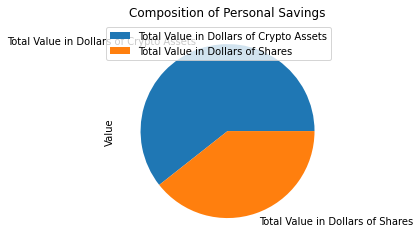

In [11]:
# Plot savings pie chart
df_savings.groupby(['Name']).sum().plot(kind='pie', y='Value', title='Composition of Personal Savings')

In [ ]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
print(emergency_fund)

36000


In [ ]:
# Calculate total amount of savings
total = df_savings.sum()
print('Total Amount of Savings:')
print(total)

Total Amount of Savings:
Name     Total Value in Dollars of Crypto AssetsTotal V...
Value                                                38036
dtype: object


In [ ]:
# Validate savings health
total_savings = 38036
emergency_fund = 36000

if total_savings > emergency_fund:
        print('Nice work! You have enough money in this fund.')

Nice work! You have enough money in this fund.


In [ ]:
# Validate savings health
total_savings = 38036
emergency_fund = 38036

if total_savings == emergency_fund:                            
        print('Congrats! You have reached your financial goal.')

Congrats! You have reached your financial goal.


In [ ]:
# Validate savings health
total_savings = 30036
emergency_fund = 36000
difference = 2036

if total_savings < emergency_fund:    
        print("Keep it up! You only have $",difference, "more to save.")

Keep it up! You only have $ 2036 more to save.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [12]:
# Set start and end dates of five years back from today
start_date = pd.Timestamp('2017-24-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-24-01', tz='America/New_York').isoformat()

In [13]:
# Set the tickers
tickers = ["AGG", "SPY"]

In [ ]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 1000
).df

# Display sample data
df_stock_data.head()

In [ ]:
# Set number of simulations
num_sims = 500

# Configure a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyears = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = num_sims,
    num_trading_days = 252*30)

In [ ]:
# Print the simulation input data
MC_thirtyyears.portfolio_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-10 00:00:00-04:00          NaN     NaN     NaN     NaN      NaN   
2017-05-11 00:00:00-04:00    -0.000046  239.35  239.57  238.13  239.410   
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   

                                                    
                               volume daily_return  
time                                                
2017-05-10 00:00:00-04:00         NaN          NaN  
2017-05-11 00:00:00-04:00  45435690.0          NaN  
2017-05-12 00:00:00-04:00  35283567.0    -0.001587  
2017-05-15 00:00:00-04:00  42230620.0     0.005083  
2017-05-16 00:00:00-04:00  37206183.0    -0.000604

In [ ]:
# Run Monte Carlo simulations to forecast 30 year cumulative returns
MC_thirtyyears.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.009035,1.019800,1.007274,0.993537,0.999989,1.006793,0.987234,0.991026,0.999287,0.989965,...,1.008802,0.990631,0.998367,0.996306,1.005638,0.999298,1.003740,0.995918,0.997987,0.987705
2,1.015749,1.016643,1.021442,0.987915,1.000572,1.007587,0.989688,0.995665,1.004104,0.985250,...,1.010723,0.982956,0.998577,0.981389,1.018035,1.000601,1.002730,0.980490,1.011566,0.984374
3,0.991994,1.011483,1.030600,0.997095,0.997604,1.005709,0.994743,0.997920,0.994627,0.997900,...,1.012315,0.989154,0.981850,0.971472,1.006515,1.002006,1.004207,0.984857,1.011721,0.987595
4,0.987360,1.008866,1.034499,1.000035,0.996255,1.003667,0.994341,0.979276,0.999065,0.996478,...,1.016074,0.968970,0.987125,0.972621,1.010508,1.005873,1.004374,0.987862,1.008460,1.000726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,15.161399,13.710953,7.014478,13.250531,17.253323,6.504709,17.273753,8.488013,10.957276,13.189109,...,8.223420,12.288181,12.515016,19.375254,10.173651,22.237832,29.862674,5.580458,13.105158,4.897044
7557,15.177512,13.738440,7.043751,13.102212,17.417942,6.477584,17.095762,8.496915,10.990621,12.939785,...,8.340971,12.323093,12.494097,19.483966,10.183564,22.458175,30.326832,5.621498,12.995128,4.964084
7558,15.330981,13.708830,7.038211,13.151718,17.470599,6.487290,16.977758,8.420851,10.888101,13.032973,...,8.363106,12.358473,12.505053,19.621043,10.328272,22.774489,30.055585,5.658289,13.078240,4.966424
7559,15.247704,13.672925,7.101012,13.252124,17.570481,6.403013,17.077302,8.521628,10.773828,12.927884,...,8.216022,12.349652,12.489294,19.596308,10.443810,22.852504,30.026844,5.669949,13.204933,4.931674


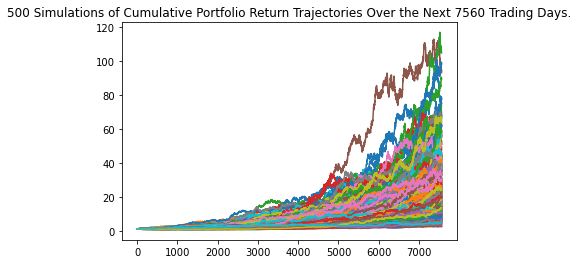

In [ ]:
# Plot simulation outcomes
line_plot = MC_thirtyyears.plot_simulation()

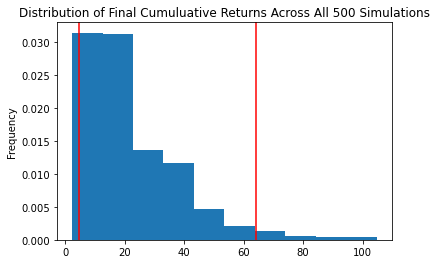

In [ ]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirtyyears.plot_distribution()

### Retirement Analysis

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats = MC_thirtyyears.summarize_cumulative_return()

# Print summary statistics
print(summary_stats)

count           500.000000
mean             22.130012
std              16.088798
min               2.342293
25%              10.465170
50%              17.476764
75%              29.550007
max             104.663919
95% CI Lower      4.779747
95% CI Upper     64.053604
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary_stats[8]*20000,2)
ci_upper = round(summary_stats[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $95594.94 and $1281072.08


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(summary_stats[8]*30000,2)
ci_upper = round(summary_stats[9]*30000,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")